In [1]:
import numpy as np

import matplotlib.pyplot as plt

import pyEulerCurves as pyecc

In [2]:
print(pyecc.__version__)

0.6


In [3]:
def Hopf_bifurcation(x, y, B):

    Hopf_bifurcation = np.zeros((x.shape[0], y.shape[0], 2))
    Hopf_bifurcation[:, :, 0] = B * x - y - x * (x**2 + y**2)
    Hopf_bifurcation[:, :, 1] = x + B * y - y * (x**2 + y**2)

    return Hopf_bifurcation


x_min, x_max = -2, 2
y_min, y_max = -2, 2

SIZE = 201

x_points, y_points = SIZE, SIZE

x = np.linspace(x_min, x_max, x_points)
y = np.linspace(y_min, y_max, y_points)
X, Y = np.meshgrid(x, y)

Hb_clean = Hopf_bifurcation(X, Y, 1)

In [4]:
# compute contributions
trans = pyecc.ECC_from_bitmap(multifiltration=True, workers=1)
trans.fit_transform(Hb_clean)
ecp_contributions = trans.contributions_list
print(len(ecp_contributions))

(41004, 2)
Parallel part done
Elapsed time: 1.3 seconds
Merged 203 dicts
Elapsed time: 0.1 seconds
54947


In [5]:
import pyEulerCurves.bifiltration_utils as butil

In [6]:
# print min and max values in each filtration
print(
    min([c[0][0] for c in ecp_contributions]), max([c[0][0] for c in ecp_contributions])
)
print(
    min([c[0][1] for c in ecp_contributions]), max([c[0][1] for c in ecp_contributions])
)

-16.0 11.564784
-16.0 15.524783999999999


In [7]:
dims = ([-17, 12], [-20, 16])

In [ ]:
ax, Z_o, f1_list_o, f2_list_o = butil.plot_ECP_OLD(ecp_contributions, dims)

creating the ECP in the range (-17, -20) - (12, 16)
creating ECP matrix of size (13954, 13946)
(13946, 13954) 13954 13946


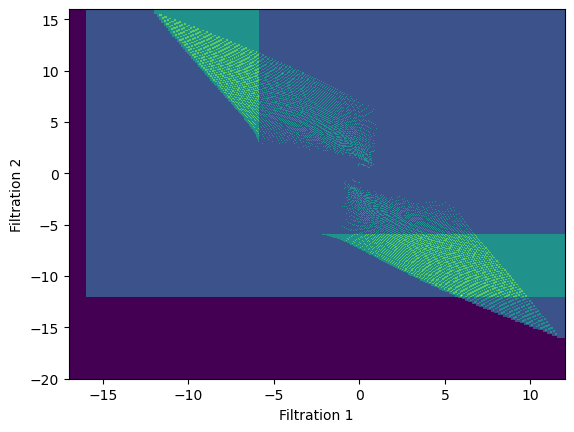

In [8]:
ax, Z_n, f1_list_n, f2_list_n = butil.plot_ECP_NEW(
    ecp_contributions, dims, verbose=True
)

In [ ]:
## check they are equal
(Z_o == Z_n).all()